# Objetivo: Lograr crear un PLL de una señal con una fase desconocida.

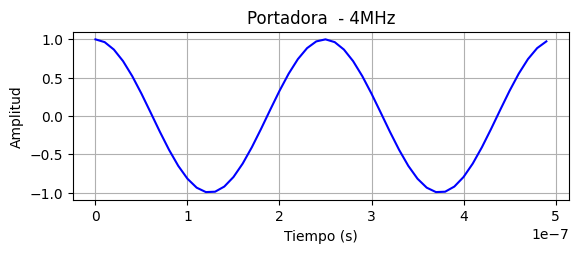

In [35]:
import numpy
import matplotlib.pyplot as plt
# Crear señal senoidal
f_seno = 4e6
A_seno = 1
fs= 100000000
t = numpy.arange(0, 0.002, 1/fs)
def señal_cosenoidal(f, A=1, desface=0):
    x = A * numpy.cos(2 * numpy.pi * f * t + desface)
    return t, x
# Definir fs para coincidir con la informacion
t_1, X_Portadora1 = señal_cosenoidal(f_seno, A_seno, desface=numpy.pi/162) #desface de 180°
ax1 = plt.subplot(2, 1, 1)
ax1.plot(t_1[0:50], X_Portadora1[0:50], color='blue') 
ax1.set_title('Portadora  - 4MHz')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud')
ax1.grid()

# Creacion de PLL

In [36]:
# Crear funcion que estime la fase de una señal y la devuelva en radianes
def estimar_fase(signal):
    # Calcular la transformada de Fourier de la señal
    fft_signal = numpy.fft.fft(signal)
    # Obtener el índice de la frecuencia fundamental (mayor magnitud)
    fundamental_index = numpy.argmax(numpy.abs(fft_signal))
    # Calcular la fase en radianes
    phase = numpy.angle(fft_signal[fundamental_index])
    return phase
fase_estimada = estimar_fase(X_Portadora1)
print(f"Fase estimada: {fase_estimada} radianes")
print(f"Fase Real: {numpy.pi/162} radianes")


Fase estimada: 0.01939254724229421 radianes
Fase Real: 0.019392547244381438 radianes
